In [1]:
import pandas as pd
import numpy as np
# from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import re
import os

In [24]:
ratings_df = pd.read_csv('/home/manishn/recommend/data/ml-latest-small/ratings.csv')

# Load the movies data
movies_df = pd.read_csv('/home/manishn/recommend/data/ml-latest-small/movies.csv')

# Merge the DataFrames on 'movieId'
merged_df = pd.merge(ratings_df, movies_df, on='movieId')

# Optionally, reorder the columns if needed
merged_df = merged_df[['userId', 'movieId', 'title', 'genres', 'rating', 'timestamp']]

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_ratings.csv', index=False)
merged_df

,userId,movieId,title,genres,rating,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703
1,5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962
2,7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1106635946
3,15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,1510577970
4,17,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1305696483
...,...,...,...,...,...,...
100831,610,160341,Bloodmoon (1997),Action|Thriller,2.5,1479545749
100832,610,160527,Sympathy for the Underdog (1971),Action|Crime|Drama,4.5,1479544998
100833,610,160836,Hazard (2005),Action|Drama|Thriller,3.0,1493844794
100834,610,163937,Blair Witch (2016),Horror|Thriller,3.5,1493848789


In [26]:
data=pd.DataFrame()
data=merged_df

In [27]:
# data=pd.read_csv('/home/manishn/recommend/data/ml-latest-small/ratings.csv')
data.head()

,userId,movieId,title,genres,rating,timestamp
0,1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,964982703
1,5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,847434962
2,7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1106635946
3,15,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2.5,1510577970
4,17,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.5,1305696483


In [29]:
MatrixData=data.drop(['timestamp','genres','title'], axis=1)
MovieUserMatrix = MatrixData.pivot_table(index='movieId',columns='userId',values='rating')
MovieUserMatrix.head()


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
MovieUserMatrix_Y=MovieUserMatrix.fillna(-1)
MovieUserMatrix_Y


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,-1.0,-1.0,-1.0,4.0,-1.0,4.5,-1.0,-1.0,-1.0,...,4.0,-1.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,4.0,-1.0,4.0,-1.0,-1.0,...,-1.0,4.0,-1.0,5.0,3.5,-1.0,-1.0,2.0,-1.0,-1.0
3,4.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
193583,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
193585,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [7]:
MovieUserMatrix_R=MovieUserMatrix.copy()
MovieUserMatrix_R=MovieUserMatrix_R.where(~MovieUserMatrix_R.notna(), 1)
MovieUserMatrix_R=MovieUserMatrix_R.fillna(0)
MovieUserMatrix_R


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
Y=MovieUserMatrix_Y.values #converting to numpy array
R=MovieUserMatrix_R.values


**Collaborative filtering:(Used to learn Features for movies)**


In [9]:
#Implementation of Collaborative filtering Cost function and gradient, regularized and non regularized
def  cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
    """
            calculates Collaborative filtering Cost function and gradient both regularized and non regularized
            
            Parameters
            ----------
            params: numpy array-like
                    initial values for users parameter vectors and movies feature vectors
            
            Y: numpy array-like
                    user-item interaction matrix
            R: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
            num_users: int-like
                    total number of users
            num_movies: int-like
                    total number of movies
            Lambda: Float-like
                    Regularization parameter
                    
            Returns
            -------
            J:Float-like
                    Cost
            grad:Float-like
                    Gradient
            reg_J:Float-like
                    Regularized Cost
            reg_grad:Float-like
                    Regularized gradient
    """
    # Unfold the params
    X = params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    predictions =  np.dot(X,Theta.T)
    err = (predictions - Y)
    J = 1/2 * np.sum((err**2) * R)# multiplying by R will consider only those values for which value of (i,j)=r(i,j)=1
    
    #compute regularized cost function
    reg_X =  Lambda/2 * np.sum(Theta**2)
    reg_Theta = Lambda/2 *np.sum(X**2)
    reg_J = J + reg_X + reg_Theta
    
    # Compute gradient
    X_grad = np.dot(err*R,Theta)
    Theta_grad = np.dot((err*R).T,X)
    grad = np.append(X_grad.flatten(),Theta_grad.flatten()) #flattening calculated gradients of 4*3 dim into 12 real number one dim of vector for optimization algo since optimization algorithms deals with vectos not matrix 
    
    # Compute regularized gradient
    reg_X_grad = X_grad + Lambda*X
    reg_Theta_grad = Theta_grad + Lambda*Theta
    reg_grad = np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    #, reg_J, reg_grad
    
    return J, grad, reg_J, reg_grad


In [10]:

#Gradient descent implementation
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):
    """
            Optimize X and Theta
            
            Parameters
            ----------
            initial_parameters: numpy array-like
                    initial values for users parameter vectors and movies feature vectors
            
            Y: numpy array-like
                    user-item interaction matrix
            R: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
            num_users: int-like
                    total number of users
            num_movies: int-like
                    total number of movies
            alpha: Float-lik
                    learning rate
            num_iters: integer-like
                    number of iterations of optimization algorithm
            Lambda: Float-like
                    Regularization parameter
                    
            Returns
            -------
            paramsFinal: numpy-array-like
                    Learned user parameters and feature vectors for movies
            J_history: numpy-array-like
                     History of decrease in cost as gradeint descent moves towords global minima
    """
    # unfold the parameters
    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    
    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        # unfold grad
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history


In [11]:

def normalizeRatings(Y, R):
    """
    normalized Y so that each movie has a rating of 0 on average, and returns the mean rating in Ymean.
    
    Parameters
    ----------
    Y: numpy array-like
                    user-item interaction matrix
    R: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
    Ynorm:numpy array-like
                    Normalize Y
    Ymean:numpy array-like
                    Mean of all movies
    """
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])         #mean rating for the 𝑖-th movie
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
    return Ynorm, Ymean


**Content Based Filtering**

In [12]:
def computeCost(X, y, theta):
    """
            calculates cost for given value of θ 
            
            Parameters
            ----------
            X: numpy-array-like
               matrix of features for all movies
               
            y: numpy-array-like
               binary vector of web-application user movie ratings (y ∈ R^9742) where 9742 is the number of movies rated by web-app user
                    
            theta:numpy-array-like
               value of θ for web application user single vector of size (d,) 
               
            Returns
            -------
            j: float-like
               cost
    """
    m=y.size
    s=np.dot(X,theta)-y
    j=(1/(2*m))*(np.dot(np.transpose(s),s))
    return j


In [13]:
def CBgradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        matrix of features for all movies
    
    y : array_like
        binary vector of ∈ R^9742 movies where 9742 is the number of movies
    
    theta : array_like
        Initial values for the web-applicaiton user parameters. 
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned parameters. 
    """
    m = float(y.shape[0])
    theta = theta.copy()
    for i in range(num_iters):
        theta=(theta)-(alpha/m)*(np.dot(np.transpose((np.dot(X,theta)-y)),X))
    return theta


In [39]:
# def prediction(X,my_ratings,moviesdataset):
#     """
#     Performs prediction.
    
#     Parameters
#     ----------
#     X : array_like
#         matrix of features for all movies
    
#     my_ratings : numpy-array-like
#         Binary vector of web-application user movie ratings (y ∈ R^9742) where 9742 is the number of movies rated by web-app user
                    
#     moviesdataset : pandas dataframe-like
#         Dataframe contains movieid and title for all 9742 movies
    
#     Returns
#     -------
#     sorted_data : array_like
#         top-N recommendation
    
#     """
#     out_arr = my_ratings[np.nonzero(my_ratings)]
#     out_arr=out_arr.reshape(-1,1)                                #(4,) (4, 1)
#     idx = np.where(my_ratings)[0]
#     X_1=[X[x] for x in idx]
#     X_1=np.array(X_1)
#     y=out_arr
#     y=np.reshape(y, -1)
#     theta =CBgradientDescent(X_1,y,np.zeros((100)),0.001,4000)
    
#     #mean=np.reshape(Ymean, -1)
#     p = X @ theta.T
#     #p=p+mean
#     p=np.reshape(p, -1)
#     predictedData=moviesdataset.copy()
#     predictedData['Pridiction']=p
#     sorted_data=predictedData.sort_values(by=['Pridiction'],ascending=False)
#     return sorted_data[:10]


In [84]:
def prediction(X, my_ratings, moviesdataset):
    """
    Performs prediction for movie recommendations based on user ratings and movie features.
    
    Parameters
    ----------
    X : array_like
        A matrix of features for all movies (shape: m x d), where m is the number of movies and d is the number of features.
    
    my_ratings : numpy-array-like
        A binary vector of movie ratings provided by the user (shape: m), where 1 indicates the movie is rated and 0 indicates it is not.
                    
    moviesdataset : pandas DataFrame
        A DataFrame containing movie information (movieId, title, etc.) for all m movies.
    
    Returns
    -------
    sorted_data : DataFrame
        The top-N recommended movies sorted by predicted ratings.
    """
    
    # Extract the ratings provided by the user, ignoring the un-rated movies
    out_arr = my_ratings[np.nonzero(my_ratings)]  # Shape: (k,), where k is the number of rated movies
    out_arr = out_arr.reshape(-1, 1)               # Reshape to (k, 1) for compatibility with other operations

    # Get the indices of the rated movies
    idx = np.where(my_ratings)[0]                  # Shape: (k,)
    
    # Collect the features of the rated movies
    X_1 = [X[x] for x in idx]                      # List of shape (k, d), where d is the number of features
    X_1 = np.array(X_1)                            # Convert to NumPy array, shape: (k, d)
    
    # Reshape the ratings for compatibility
    y = out_arr                                     # Shape: (k, 1)
    y = np.reshape(y, -1)                           # Reshape to (k,) for gradient descent

    # Perform gradient descent to learn the parameters (theta) based on the rated movies
    theta = CBgradientDescent(X_1, y, np.zeros((100)), 0.001, 4000)
    # Here, theta will have shape: (n,) after optimization
    # print(theta)
    # Predict ratings for all movies using learned parameters
    p = X @ theta.T                                 # Shape: (m,) where m is the number of movies
    p = np.reshape(p, -1)                           # Ensure p is a 1D array

    # Prepare the predicted data for sorting
    predictedData = moviesdataset.copy()            # Create a copy of the original DataFrame
    predictedData['Prediction'] = p                 # Add predicted ratings to the DataFrame

    # Sort the DataFrame based on predicted ratings in descending order
    sorted_data = predictedData.sort_values(by=['Prediction'], ascending=False)
    
    # Return the top 10 recommended movies
    return sorted_data[:10]                         # Shape: (10, p+1), where p is the number of columns in moviesdataset



In [15]:
def train_test_split(Yratings,Rratings):
    """
    train and test split
    Parameters
    ----------
    Yratings: numpy array-like
                    user-item interaction matrix
    Rratings: numpy arra-like
                    Its a binary-valued indicator matrix for user-item interaction matrix
                    
    Returns
    -------
    Ytrain: numpy array-like
                   train user-item interaction matrix
    Ytest:  numpy array-like
                   test user-item interaction matrix
    Rtrain: numpy array-like
                   train its a binary-valued indicator matrix for user-item interaction matrix
    Rtest:  numpy array-like
                   test its a binary-valued indicator matrix for user-item interaction matrix
    
    """
    Ytest = np.zeros(Yratings.shape)
    Ytrain = Yratings.copy()
    Rtest = np.zeros(Rratings.shape)
    Rtrain = Rratings.copy()
    
    for user in range(Yratings.shape[0]):
        try:
            test_ratings = np.random.choice(Yratings[user, :].nonzero()[0], 
                                            size=10, 
                                            replace=False)
            Ytrain[user, test_ratings] = 0.
            Ytest[user, test_ratings] = Yratings[user, test_ratings]
            
            Rtrain[user, test_ratings] = 0.
            Rtest[user, test_ratings] = Rratings[user, test_ratings]
        except ValueError:
            test_ratings = np.random.choice(Yratings[user, :].nonzero()[0], 
                                            size=10, 
                                            replace=True)
            Ytrain[user, test_ratings] = 0.
            Ytest[user, test_ratings] = Yratings[user, test_ratings]
            
            Rtrain[user, test_ratings] = 0.
            Rtest[user, test_ratings] = Rratings[user, test_ratings]
    # Test and training are truly disjoint
    assert(np.all((Ytrain * Ytest) == 0))
    assert(np.all((Rtrain * Rtest) == 0))
    return Ytrain, Ytest, Rtrain, Rtest


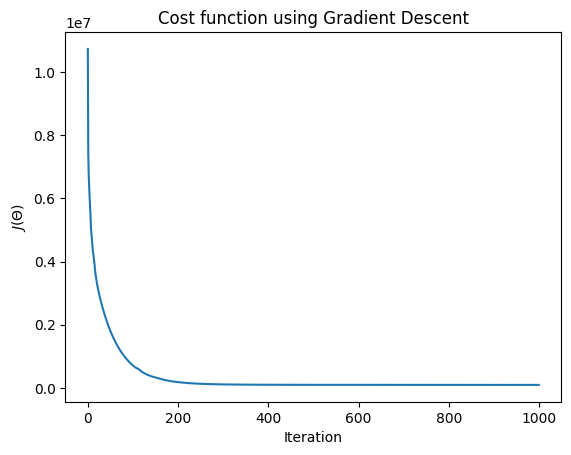

In [16]:
#Train-Test split
Ytrain, Ytest, Rtrain, Rtest = train_test_split(Y,R)
num_users = Ytrain.shape[1]
num_movies = Ytrain.shape[0]
num_features = 100

# Set initial Parameters (Theta,X)
X = np.random.randn(num_movies, num_features)
Theta = np.random.randn(num_users, num_features)
initial_parameters = np.append(X.flatten(),Theta.flatten())
Lambda = 10

# learns Features for movies and parameters for all users using Collaborative filtering
paramsFinal, J_history = gradientDescent(initial_parameters,Ytrain,Rtrain,num_users,num_movies,num_features,0.001,1000,Lambda)

plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)


In [17]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)


In [18]:
def learningCurve(Ytrain,Rtrain,Ytest,Rtest):
    """
    compute data for learning Curve
                    
    Parameters
    -------
    Ytrain: numpy array-like
                   train user-item interaction matrix
    Ytest:  numpy array-like
                   test user-item interaction matrix
    Rtrain: numpy array-like
                   train its a binary-valued indicator matrix for user-item interaction matrix
    Rtest:  numpy array-like
                   test its a binary-valued indicator matrix for user-item interaction matrix
                   
    Returns
    -------
    
    train_size_hist: numpy array-like
                   different training set sizes used
    train_score_hist: numpy array-like
                   scores relative to training size
    test_size_hist: numpy array-like
                   different test set sizes used
    test_score_hist: numpy array-like
                   scores relative to training size
    
    """
    Y=Ytrain
    R=Rtrain
    test_Y=Ytest
    test_R=Rtest
    train_size_hist=[]
    train_score_hist=[]
    test_size_hist=[]
    test_score_hist=[]
    size_list=[1,100,800,1000,1500,2000,2500,3000,3300,3800,4800,5900,6500,7000,7600,8300,9724]
    for size in size_list:
        Ytrain=Y[:size]
        Rtrain=R[:size]
        Ytest=test_Y[:size]
        Rtest=test_R[:size]
        num_users = Ytrain.shape[1]
        num_movies = Ytrain.shape[0]
        num_features = 100

        # Set initial Parameters (Theta,X)
        X = np.random.randn(num_movies, num_features)
        Theta = np.random.randn(num_users, num_features)
        initial_parameters = np.append(X.flatten(),Theta.flatten())
        Lambda = 10

        # Optimize parameters using Gradient Descent
        paramsFinal, J_history = gradientDescent(initial_parameters,Ytrain,Rtrain,num_users,num_movies,num_features,0.001,1000,Lambda)
        X = paramsFinal[:num_movies*num_features].reshape(num_movies,num_features)
        Theta = paramsFinal[num_movies*num_features:].reshape(num_users,num_features)
        pred = X @ Theta.T
        pred=pred*Rtrain
        actual=Ytrain
        train_size_hist.append(size)
        train_score_hist.append(get_mse(pred, actual))
        pred = X @ Theta.T
        pred=pred*Rtest
        actual=Ytest
        test_size_hist.append(size)
        test_score_hist.append(get_mse(pred, actual))
    return train_size_hist,train_score_hist,test_size_hist,test_score_hist


In [19]:
train_size_hist,train_score_hist,test_size_hist,test_score_hist=learningCurve(Ytrain,Rtrain,Ytest,Rtest)


/tmp/ipykernel_1534034/2584016827.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(0.97, 1.05)

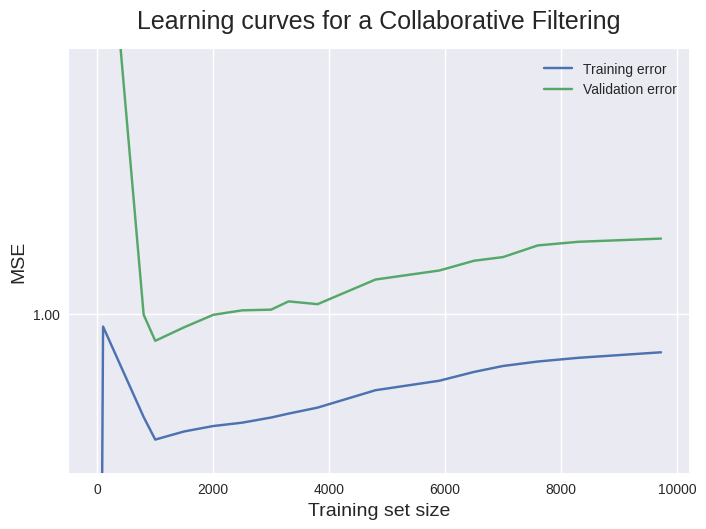

In [20]:
plt.style.use('seaborn')
plt.plot(train_size_hist, train_score_hist, label = 'Training error')
plt.plot(train_size_hist, test_score_hist, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.yticks(np.arange(0,2, 0.25))
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Collaborative Filtering', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0.97,1.05)


In [32]:
#cleaning and transforming moviesDataset to use it on web-application 
moviesdataset=merged_df.drop(['userId','rating','timestamp','genres'],axis=1)
moviesdataset=moviesdataset.drop_duplicates()
moviesdataset=moviesdataset.sort_values("movieId")
moviesdataset=moviesdataset.reset_index(drop=True)
moviesdataset["title"] = moviesdataset["title"].str.lower() 
moviesdataset["title"] = moviesdataset["title"].str.replace(r"\(.*\)","")
moviesdataset.head()



,movieId,title
0,1,toy story (1995)
1,2,jumanji (1995)
2,3,grumpier old men (1995)
3,4,waiting to exhale (1995)
4,5,father of the bride part ii (1995)


In [56]:
moviesdataset.shape

(9724, 2)

In [85]:
my_ratings = np.zeros((9724,1))

# test rating by web-applicaiton user
my_ratings[0] = 4 
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[82]= 4
my_ratings[225] = 5
my_ratings[354]= 5

print("New user ratings:\n")
for i in range(len(my_ratings)):
    if my_ratings[i]>0:
        print("Rated",int(my_ratings[i]),"for Movie")
        print((moviesdataset.iloc[i]).title)


New user ratings:

Rated 4 for Movie
toy story (1995)
Rated 3 for Movie
sabrina (1995)
Rated 5 for Movie
dracula: dead and loving it (1995)
Rated 4 for Movie
indian in the cupboard, the (1995)
Rated 5 for Movie
fair game (1995)
Rated 3 for Movie
misérables, les (1995)
Rated 5 for Movie
screamers (1995)
Rated 4 for Movie
vampire in brooklyn (1995)
Rated 2 for Movie
braveheart (1995)
Rated 5 for Movie
little women (1994)
Rated 5 for Movie
above the rim (1994)


In [86]:
# top-N-movies
prediction(X,my_ratings,moviesdataset)


,movieId,title,Prediction
461,527,schindler's list (1993),5.021200
322,364,"lion king, the (1994)",4.916782
0,1,toy story (1995),4.734745
506,588,aladdin (1992),4.724274
32,34,babe (1995),4.705785
33,36,dead man walking (1995),4.691259
505,587,ghost (1990),4.600269
546,648,mission: impossible (1996),4.576503
334,377,speed (1994),4.558297
510,593,"silence of the lambs, the (1991)",4.549561


In [87]:
import numpy as np

def calculate_accuracy(Ytest, Rtest, X, Theta):
    """
    Calculate the accuracy of the model using Mean Absolute Error (MAE) and Root Mean Square Error (RMSE).
    
    Parameters
    ----------
    Ytest : numpy array-like
        Test user-item interaction matrix with actual ratings.
        
    Rtest : numpy array-like
        Binary indicator matrix for the test set (1 if a rating exists, 0 otherwise).
        
    X : numpy array-like
        Matrix of movie features learned during training.
        
    Theta : numpy array-like
        Matrix of user parameters learned during training.

    Returns
    -------
    mae : float
        Mean Absolute Error.
    
    rmse : float
        Root Mean Square Error.
    """
    # Make predictions
    predictions = np.dot(X, Theta.T)  # Predicted ratings matrix

    # Only consider the entries where Rtest is 1 (ratings exist)
    error = (predictions - Ytest) * Rtest  # Element-wise error where Rtest is 1

    # Mean Absolute Error
    mae = np.sum(np.abs(error)) / np.sum(Rtest)  # Average over existing ratings

    # Root Mean Square Error
    rmse = np.sqrt(np.sum(error**2) / np.sum(Rtest))  # RMSE calculation
    
    return mae, rmse

# Calculate accuracy
mae, rmse = calculate_accuracy(Ytest, Rtest, X, Theta)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")


Mean Absolute Error: 1.0183276110471402
Root Mean Square Error: 1.3916221605135397


In [62]:
# # Mean Absolute Error (MAE): Indicates the average absolute difference between predicted and actual ratings. A lower MAE indicates better model performance.
# # Root Mean Square Error (RMSE): Gives a higher penalty to larger errors, useful for understanding how much predictions deviate from actual ratings.
# Mean Absolute Error (MAE): 1.0183
# Interpretation: On average, the predicted ratings deviate from the actual ratings by approximately 1.02 units. This means that, for each rating, your model's predictions are off by a bit over one point. While this is a relatively low MAE, the acceptability depends on the rating scale (e.g., if ratings are from 1 to 5, this deviation might be considered acceptable).
# Root Mean Square Error (RMSE): 1.3916
# Interpretation: RMSE, which penalizes larger errors more than MAE, suggests that the predicted ratings have a standard deviation of about 1.39 units from the actual ratings. Like MAE, a lower RMSE indicates better predictive accuracy. RMSE provides a more sensitive measure when you have larger discrepancies in ratings.
